# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [1]:
%pip install statsmodels
%pip install nbformat
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [2]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

In [7]:

fig = px.scatter(student_data, x='Age', y='Tardies', title='Age vs Tardies')
fig.show()


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

*your explanation here*

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [8]:
# Calculate covariance and correlation
covariance = student_data['Age'].cov(student_data['Tardies'])
correlation = student_data['Age'].corr(student_data['Tardies'])

print(f"Covariance: {covariance}")
print(f"Correlation: {correlation}")

# ------------------------------------------------------------------
# Covariance: Measures how 'Age' and 'Tardies' vary together.
# Here: Covariance ≈ -49.78 → As age increases, tardiness tends to decrease.

# Correlation: A standardized measure between -1 and 1.
# Here: Correlation ≈ -0.91 → A strong negative linear relationship between age and tardiness.

# The difference:
# - Covariance is scale-dependent (units matter, harder to interpret across datasets).
# - Correlation is unitless and normalized, making it more interpretable and comparable.

# In this case:
# Both measures confirm that older students tend to be significantly less tardy.
# ------------------------------------------------------------------

Covariance: -45.56666666666666
Correlation: -0.9391626886887122


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [11]:
# Build a simple linear regression model
# Outcome variable (dependent): Tardies
# Predictor (independent): Age
model = smf.ols('Tardies ~ Age', data=student_data).fit()

# Display regression results
print(model.summary())

# ------------------------------------------------------------------
# Outcome variable: Tardies
#   This is the variable we are trying to predict or explain.
#   It represents how many times a student was late.

# Predictor variable: Age
#   This is the explanatory variable that we believe may influence the outcome.

# Type of regression: Simple Linear Regression
#   We are using ordinary least squares (OLS) to fit a straight line between Age and Tardies.
#   Only one independent variable is used, so this is a simple (not multiple) linear regression.

# Interpretation:
#   The regression model attempts to quantify the relationship between a student's age
#   and how often they are tardy. A negative coefficient for Age would indicate that
#   as age increases, tardiness decreases — which matches what we observed in the data.
# ------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Thu, 29 May 2025   Prob (F-statistic):           5.57e-05
Time:                        15:20:35   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.0

C:\Users\jdvdb\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning:

`kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.



Plot your regression model on your scatter plot.

In [12]:
import plotly.graph_objects as go 

# Regressiemodel
model = smf.ols('Tardies ~ Age', data=student_data).fit()
student_data['Predicted_Tardies'] = model.predict(student_data['Age'])

# Basis scatterplot
fig = px.scatter(student_data, x='Age', y='Tardies', title='Age vs Tardies with Regression Line')

# Regessielijn toevoegen met Graph Object
fig.add_trace(go.Scatter(
    x=student_data['Age'],
    y=student_data['Predicted_Tardies'],
    mode='lines',
    name='Regression Line',
    line=dict(color='red')
))

# Tonen
fig.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

*your explanation here*

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [22]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("../vehicles.csv")
vehicles = vehicles.rename(columns={
    'Engine Displacement': 'EngineDisplacement',
    'Fuel Type': 'FuelType',
    'Combined MPG': 'CombinedMPG'
})

# Drop rows with missing values in relevant columns
vehicles = vehicles.dropna(subset=[
    'CombinedMPG', 'EngineDisplacement', 'Cylinders',
    'Transmission', 'Drivetrain', 'FuelType'
])

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [15]:
display(vehicles.head())

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [23]:
# Build the multiple linear regression model
# Dependent variable: Combined MPG
# Predictors: Engine Displacement, Cylinders, Transmission, Drivetrain, Fuel Type
model = smf.ols(
    formula='CombinedMPG ~ EngineDisplacement + Cylinders + C(Transmission) + C(Drivetrain) + C(FuelType)',
    data=vehicles
).fit()
# Print regression results
print(model.summary())

# --------------------------------------------------------------------
# Outcome variable (dependent): Combined MPG
#   → This is what we are trying to predict: a car’s fuel efficiency.

# Type of regression: Multiple Linear Regression
#   → We are using several predictor variables to explain variations in one continuous outcome.

# Predictors used:
#   - Engine Displacement (numeric)
#   - Cylinders (numeric)
#   - Transmission (categorical)
#   - Drivetrain (categorical)
#   - Fuel Type (categorical)

# Explanation:
#   Each coefficient in the model represents the estimated effect of that variable
#   on the Combined MPG, while holding all other variables constant.

# The use of C(...) wraps categorical variables, so they are automatically one-hot encoded.
# The model uses OLS (Ordinary Least Squares) to fit the best linear relationship.
# --------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:            CombinedMPG   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     1700.
Date:                Thu, 29 May 2025   Prob (F-statistic):               0.00
Time:                        15:39:15   Log-Likelihood:                -84404.
No. Observations:               35952   AIC:                         1.689e+05
Df Residuals:                   35886   BIC:                         1.695e+05
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:

#              OLS Regression Results                            
# ==============================================================================
# Dep. Variable:            CombinedMPG   R-squared:                       0.755
# Model:                            OLS   Adj. R-squared:                  0.754
# Method:                 Least Squares   F-statistic:                     1700.
# Date:                Thu, 29 May 2025   Prob (F-statistic):               0.00
# Time:                        15:39:15   Log-Likelihood:                -84404.
# No. Observations:               35952   AIC:                         1.689e+05
# Df Residuals:                   35886   BIC:                         1.695e+05
# Df Model:                          65                                         
# Covariance Type:            nonrobust                                         
# =======================================================================================================================
#                                                           coef    std err          t      P>|t|      [0.025      0.975]
# -----------------------------------------------------------------------------------------------------------------------
# Intercept                                              36.0225      2.010     17.922      0.000      32.083      39.962
# C(Transmission)[T.Auto (AV-S6)]                        -4.5086      3.215     -1.402      0.161     -10.810       1.792

# --------------------------------------------------------------------
# Interpretation of OLS Regression Output
#
# Dep. Variable: CombinedMPG
#   → This is the outcome we're predicting: combined miles per gallon (fuel efficiency).
#
# R-squared: 0.755
#   → About 75.5% of the variation in MPG is explained by the model.
#   → This indicates a strong overall model fit.
#
# Adj. R-squared: 0.754
#   → Slightly adjusted for the number of predictors; very close to R², suggesting no overfitting.
#
# F-statistic: 1700, Prob (F-statistic): 0.00
#   → The overall model is statistically significant (p < 0.001).
#   → At least one predictor has a meaningful relationship with MPG.
#
# No. Observations: 35952
#   → The model was fit using 35,952 rows of data.
#
# Df Model: 65
#   → The model includes 65 predictor variables (including dummy variables for categorical fields).
#
# AIC / BIC: Information criteria for comparing models (lower is better).
#   → Useful when evaluating multiple models.
#
# Example Coefficient: C(Transmission)[T.Auto (AV-S6)] = -4.5086
#   → Vehicles with "Auto (AV-S6)" transmission have ~4.51 lower MPG than the baseline transmission type,
#     holding all other variables constant.
#
# Standard Error: 3.215
#   → There's moderate uncertainty in the coefficient estimate.
#
# t-statistic: -1.402
#   → The coefficient is about 1.4 standard errors away from 0.
#
# P>|t|: 0.161
#   → This p-value > 0.05 means the variable is NOT statistically significant.
#   → We cannot be confident that this specific transmission type has a real effect on MPG.
#
# Confidence Interval: [-10.810, 1.792]
#   → The true effect might be negative or slightly positive; the interval crosses 0.
#
# Conclusions:
#   - The model explains MPG well (strong R²).
#   - Variables like EngineDisplacement and Cylinders are likely to be significant predictors.
#   - Variables with p-values > 0.05 may not have reliable influence and could be excluded or reviewed.
#   - Use the model for prediction, but interpret weak predictors with caution.
# --------------------------------------------------------------------


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [25]:
data = pd.DataFrame({
    'Invited': [1, 3, 4, 6, 8, 9, 11, 14],
    'Attended': [1, 2, 4, 4, 5, 7, 8, 13]
})


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

                            OLS Regression Results                            
Dep. Variable:               Attended   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Thu, 29 May 2025   Prob (F-statistic):           0.000102
Time:                        16:03:13   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4394      0.759     -0.579      0.5

C:\Users\jdvdb\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning:

`kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.



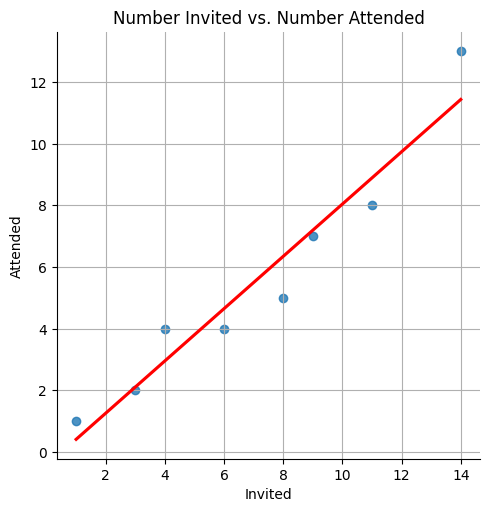

In [26]:

# Fit a simple linear regression model
model = smf.ols('Attended ~ Invited', data=data).fit()

# Print regression summary
print(model.summary())

# Plot the data and regression line
sns.lmplot(x='Invited', y='Attended', data=data, ci=None, line_kws={'color': 'red'})
plt.title('Number Invited vs. Number Attended')
plt.grid(True)
plt.show()

# ---------------------------------------------------------------
# Outcome variable: Attended (Y)
# Predictor variable: Invited (X)
# Type of regression: Simple Linear Regression
#
# What does the model tell you?
# - If the coefficient for 'Invited' is significantly positive (p < 0.05),
#   it means that more invitations lead to more attendees.
# - If the coefficient is flat or insignificant, inviting more people
#   does not necessarily lead to more attendees.
#
# Interpretation of the slope (coef):
# - Example: If coef = 0.8 → each extra invite brings 0.8 more attendees on average.
#
# Final conclusion:
# - If the line is **below** the identity line (Y = X), it supports your suspicion:
#   the proportion of attendees goes down as you invite more people.
# - If the model fits well (high R²) and the slope is < 1,
#   then **your hunch is supported**: attendance rate declines as party size increases.
# ---------------------------------------------------------------

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*your explanation here*

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

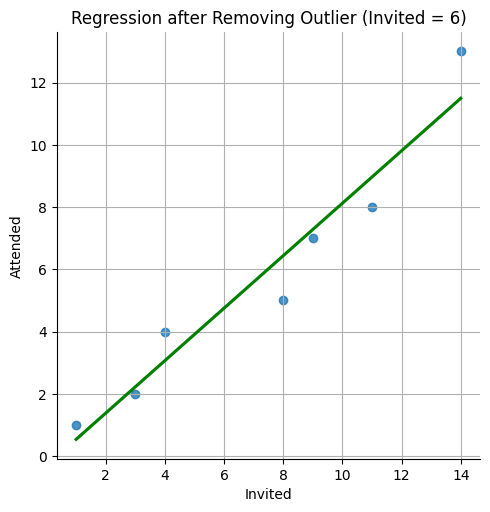

In [32]:
# Fit oorspronkelijk model
model = smf.ols('Attended ~ Invited', data=data).fit()
data['residuals'] = model.resid

# Bekijk residuen
# print(data[['Invited', 'Attended', 'residuals']])

# Verwijder de outlier (bijv. bij Invited == 6)
filtered_data = data[data['Invited'] != 6]

# Pas opnieuw het model toe
model_filtered = smf.ols('Attended ~ Invited', data=filtered_data).fit()
# print(model_filtered.summary())

# Plot met nieuwe data
sns.lmplot(x='Invited', y='Attended', data=filtered_data, ci=None, line_kws={'color': 'green'})
plt.title('Regression after Removing Outlier (Invited = 6)')
plt.grid(True)
plt.show()


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*